In [1]:
import numpy as np
import pandas as pd
import time

import os
import json
from pathlib import Path

import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np
from pathlib import Path

#for dirname, _, filenames in os.walk('/kaggle/input'):
for dirname, _, filenames in os.walk("input"):
    print(dirname)

input
input\evaluation
input\training


In [2]:
#data_path = Path('/kaggle/input/abstraction-and-reasoning-challenge/')
data_path = Path('input/')
training_path = data_path / 'training'
evaluation_path = data_path / 'evaluation'
test_path = data_path / 'test'
training_tasks = sorted(os.listdir(training_path))
eval_tasks = sorted(os.listdir(evaluation_path))

In [3]:
#已解決的ID
solved_id=set()
solved_eva_id=set()

In [4]:
T = training_tasks
Trains = []
for i in range(400):
    task_file = str(training_path / T[i])
    task = json.load(open(task_file, 'r'))
    Trains.append(task)
    
E = eval_tasks
Evals= []
for i in range(400):
    task_file = str(evaluation_path / E[i])
    task = json.load(open(task_file, 'r'))
    Evals.append(task)

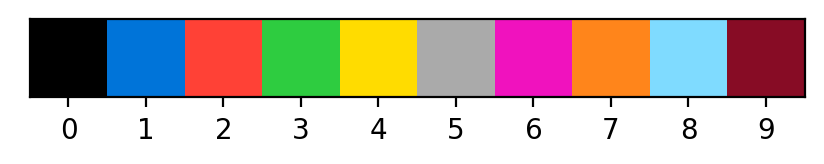

In [5]:
cmap = colors.ListedColormap(
    ['#000000', '#0074D9','#FF4136','#2ECC40','#FFDC00',
     '#AAAAAA', '#F012BE', '#FF851B', '#7FDBFF', '#870C25'])
norm = colors.Normalize(vmin=0, vmax=9)
# 0:black, 1:blue, 2:red, 3:greed, 4:yellow,
# 5:gray, 6:magenta, 7:orange, 8:sky, 9:brown
plt.figure(figsize=(5, 2), dpi=200)
plt.imshow([list(range(10))], cmap=cmap, norm=norm)
plt.xticks(list(range(10)))
plt.yticks([])
plt.show()

def plot_task(task):
    n = len(task["train"]) + len(task["test"])
    fig, axs = plt.subplots(2, n, figsize=(4*n,8), dpi=50)
    plt.subplots_adjust(wspace=0, hspace=0)
    fig_num = 0
    
    for i, t in enumerate(task["train"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Train-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Train-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    for i, t in enumerate(task["test"]):
        t_in, t_out = np.array(t["input"]), np.array(t["output"])
        axs[0][fig_num].imshow(t_in, cmap=cmap, norm=norm)
        axs[0][fig_num].set_title(f'Test-{i} in')
        axs[0][fig_num].set_yticks(list(range(t_in.shape[0])))
        axs[0][fig_num].set_xticks(list(range(t_in.shape[1])))
        axs[1][fig_num].imshow(t_out, cmap=cmap, norm=norm)
        axs[1][fig_num].set_title(f'Test-{i} out')
        axs[1][fig_num].set_yticks(list(range(t_out.shape[0])))
        axs[1][fig_num].set_xticks(list(range(t_out.shape[1])))
        fig_num += 1
    
    plt.tight_layout()
    plt.show()

In [6]:

def plot_picture(x):
    plt.imshow(np.array(x), cmap = cmap, norm = norm)
    plt.show()

In [7]:
#Transformations
def Vert(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[n-1-i][j]
    return ans.tolist()

def Hor(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[i][j] = 0+M[i][k-1-j]
    return ans.tolist()

def Rot1(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[i][k-1-j]
    return ans.tolist()
            
def Rot2(M):
    n = len(M)
    k = len(M[0])
    ans = np.zeros((k,n), dtype = int)
    for i in range(n):
        for j in range(k):
            ans[j][i] = 0 + M[n-1-i][j]
    return ans.tolist()

In [8]:
Geometric = [[Hor, Hor], [Rot2], [Rot1, Rot1], [Rot1], [Vert], [Hor, Rot2], [Hor], [Vert, Rot2]]

In [9]:
BACKGROUND=0
def _get_bound(img0):
    img=np.array(img0)
    h, w = img.shape
    x0 = w - 1
    x1 = 0
    y0 = h - 1
    y1 = 0
    for x in range(w):
        for y in range(h):
            if img[y, x] == BACKGROUND:
                continue
            x0 = min(x0, x)
            x1 = max(x1, x)
            y0 = min(y0, y)
            y1 = max(y1, y)
    return x0, x1, y0, y1
def get_bound_image(img0):
    x0,x1,y0,y1=_get_bound(img0)
    img=np.array(img0)
    return img[y0:y1+1,x0:x1+1].tolist()

In [10]:
def Defensive_Copy(A): 
    if type(A)!=list:
        A=A.tolist()
    n = len(A)
    k = len(A[0])
    L = np.zeros((n,k), dtype = int)
    for i in range(n):
        for j in range(k):
            L[i,j] = 0 + A[i][j]
    return L.tolist()

In [11]:
def Apply_geometric(S, x):
    if S in Geometric:
        x1 = Defensive_Copy(x)
        for t in S:
            x1 = t(x1)
    return x1

In [12]:
def Cut(M, r1, r2): #Cut a region into tiles
    List = []
    n = len(M)
    n1 = n//r1
    k = len(M[0])
    k1 = k//r2
    for i in range(r1):
        for j in range(r2):
            R = np.zeros((n1,k1), dtype = int)
            for t1 in range(n1):
                for t2 in range(k1):
                    R[t1,t2] = 0+M[i*n1+t1][j*k1+t2]
            List.append(R.tolist())
    return List

In [13]:
def Glue(List, r1, r2): #Combine tiles to one picture
    n1 = len(List[0])
    k1 = len(List[0][0])
    ans = np.zeros((n1*r1, k1*r2), dtype = int)
    counter = 0
    for i in range(r1):
        for j in range(r2):
            R = List[counter]
            counter +=1
            for t1 in range(n1):
                for t2 in range(k1):
                    ans[i*n1+t1, j*k1+t2] = 0 + R[t1][t2]
    return ans.tolist()

In [14]:
def Match_trans(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    for i in range(len(Geometric)):
        S = Geometric[i]
        solved = True
        for x, y in zip(Input,Output):
            transformed_x = Apply_geometric(S,x)
            if transformed_x != y:
                solved = False
                break
        if solved == True:
            Transformed_Test_Case = Apply_geometric(S, Test_Case)
            return Transformed_Test_Case
    return -1

In [15]:
def Solve_trans(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mosaics
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    same_ratio = True
    R_x = []
    R_y = []
    for x, y in zip(Input[:-1],Output):
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        if n2%n1 != 0 or k2%k1 != 0:
            same_ratio = False
            break
        else :
            R_y.append(n2//n1)
            R_x.append(k2//k1)
    if same_ratio and min(R_x) == max(R_x) and min(R_y) == max(R_y): 
        r1 = min(R_y)
        r2 = min(R_x)
        Fractured_Output = [Cut(x, r1, r2) for x in Output]
        
        Partial_Solutions = []
        for panel in range(r1*r2):
            List = [Fractured_Output[i][panel] for i in range(len(Output))]
            
            proposed_solution = Match_trans([Input, List])
            
            if proposed_solution == -1:
                return -1
            else: 
                Partial_Solutions.append(proposed_solution)
        Transformed_Test_Case = Glue(Partial_Solutions, r1, r2)
        return Transformed_Test_Case    
        
    return -1

In [16]:
def Match_trans_bound(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    for i in range(len(Geometric)):
        S = Geometric[i]
        solved = True
        for x0, y in zip(Input,Output):
            x=get_bound_image(x0)
            transformed_x = Apply_geometric(S,x)
            if transformed_x != y:
                solved = False
                break
        if solved == True:
            Test_Case_bound=get_bound_image(Test_Case)
            Transformed_Test_Case = Apply_geometric(S, Test_Case_bound)
            return Transformed_Test_Case
    return -1
def Solve_trans_bound(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mosaics
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    same_ratio = True
    R_x = []
    R_y = []
    for x0, y in zip(Input[:-1],Output):
        x=get_bound_image(x0)
        if x==[]:
            same_ratio = False
            break
            
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        if n2%n1 != 0 or k2%k1 != 0:
            same_ratio = False
            break
        else :
            R_y.append(n2//n1)
            R_x.append(k2//k1)
    if same_ratio and min(R_x) == max(R_x) and min(R_y) == max(R_y): 
        r1 = min(R_y)
        r2 = min(R_x)
        Fractured_Output = [Cut(x, r1, r2) for x in Output]
        
        Partial_Solutions = []
        for panel in range(r1*r2):
            List = [Fractured_Output[i][panel] for i in range(len(Output))]
            
            proposed_solution = Match_trans_bound([Input, List])
            
            if proposed_solution == -1:
                return -1
            else: 
                Partial_Solutions.append(proposed_solution)
        Transformed_Test_Case = Glue(Partial_Solutions, r1, r2)
        return Transformed_Test_Case    
        
    return -1

In [17]:
def Create(task, task_id = 0):
    n = len(task['train'])
    Input = [Defensive_Copy(task['train'][i]['input']) for i in range(n)]
    Output = [Defensive_Copy(task['train'][i]['output']) for i in range(n)]
    Input.append(Defensive_Copy(task['test'][task_id]['input']))
    return Input, Output

30 0


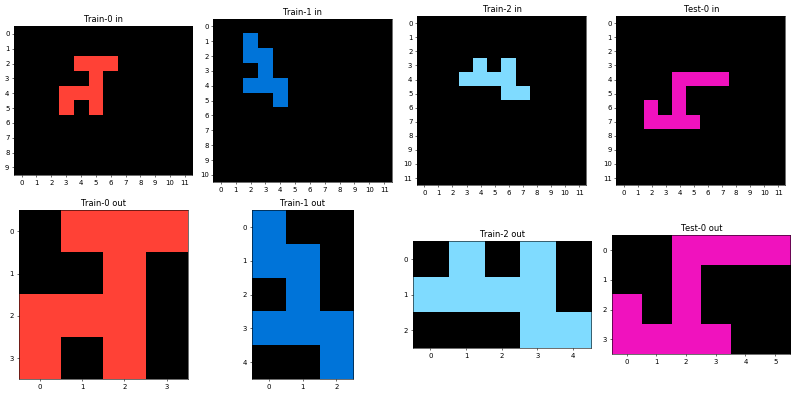

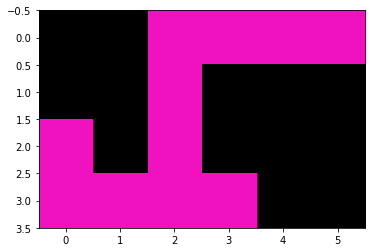

56 0


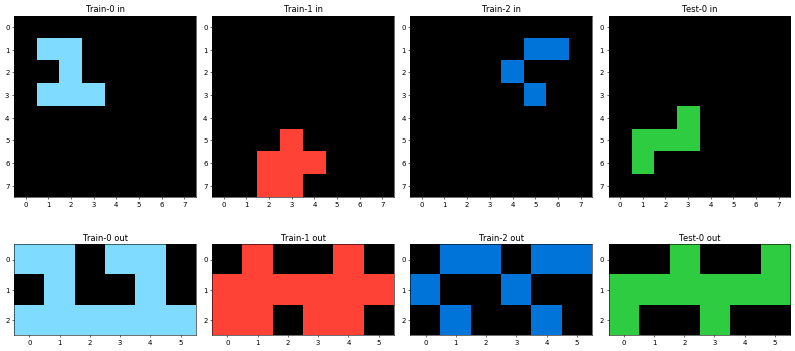

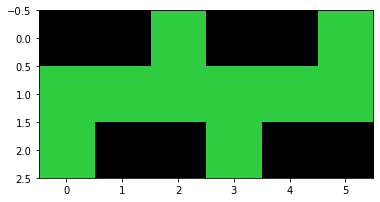

86 0


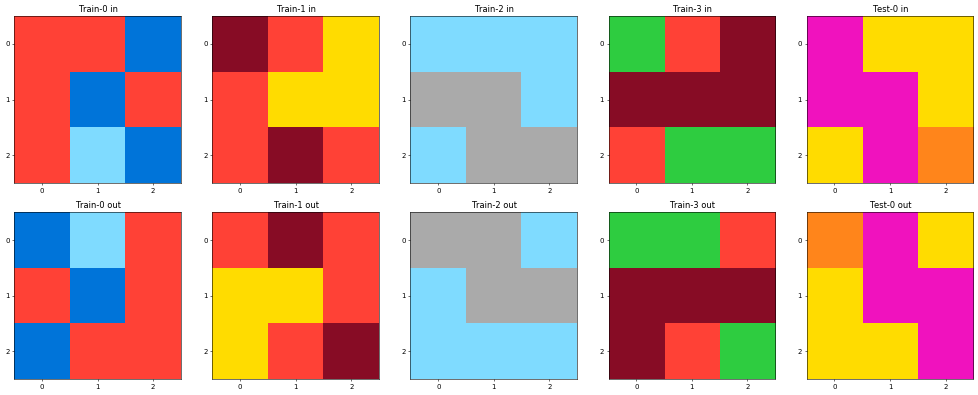

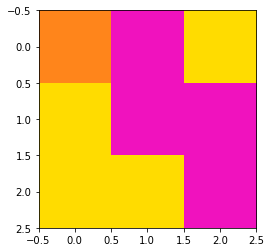

105 0


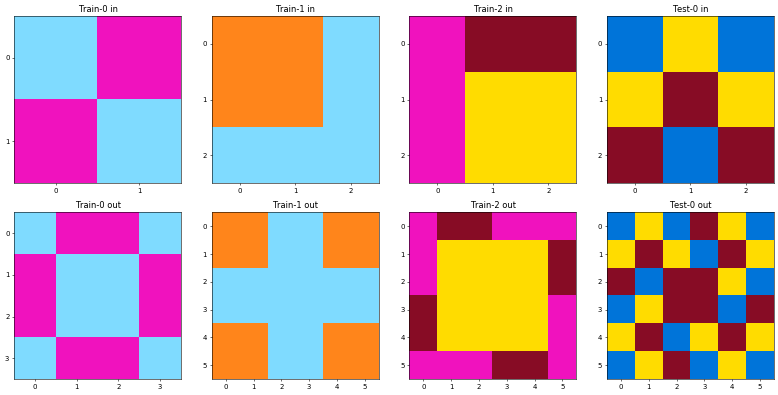

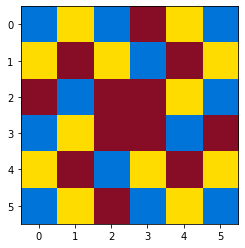

115 0


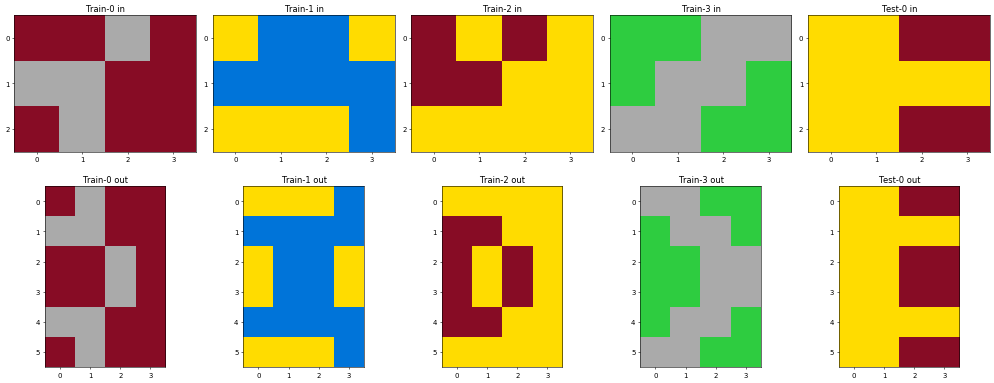

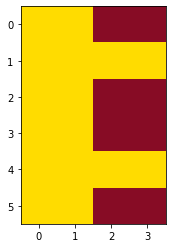

141 0


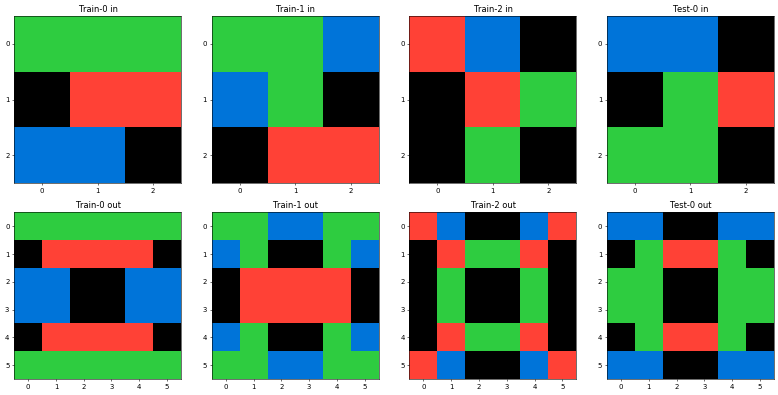

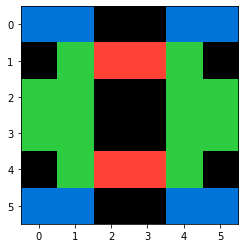

149 0


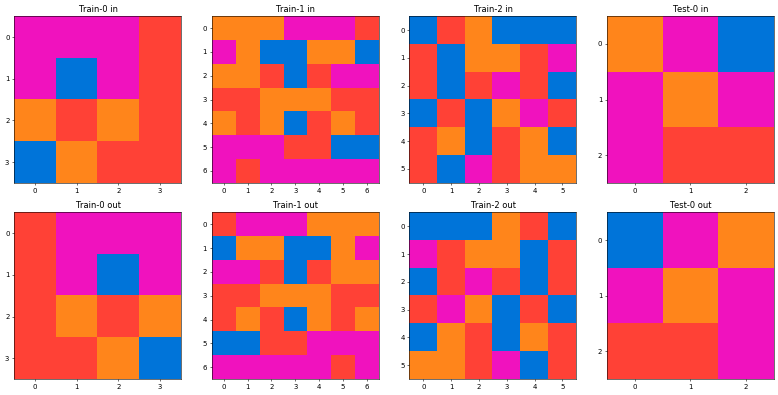

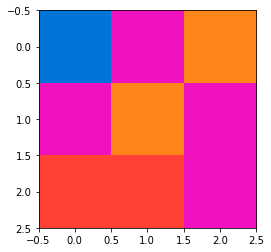

151 0


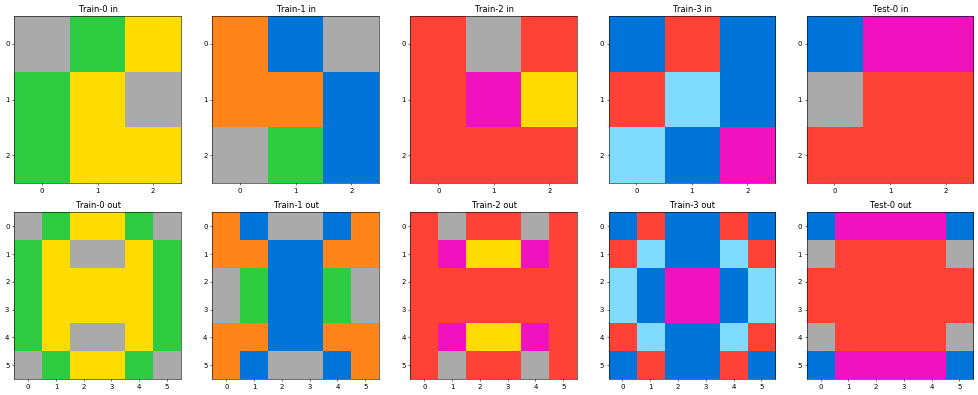

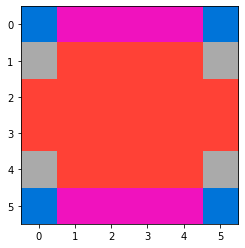

154 0


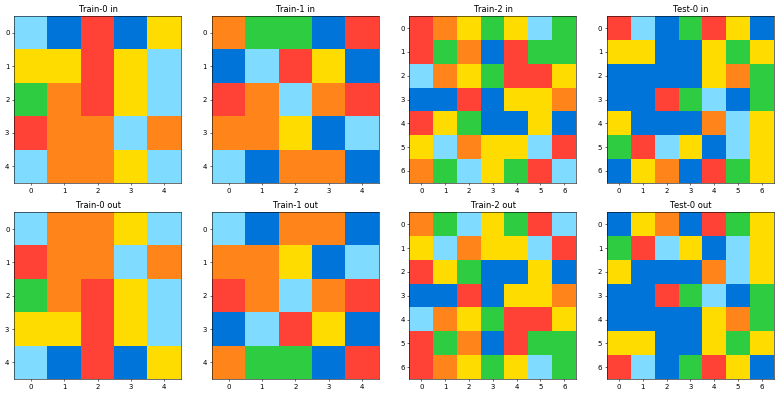

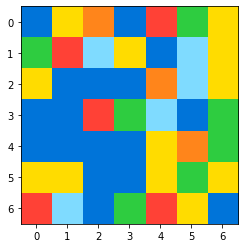

163 0


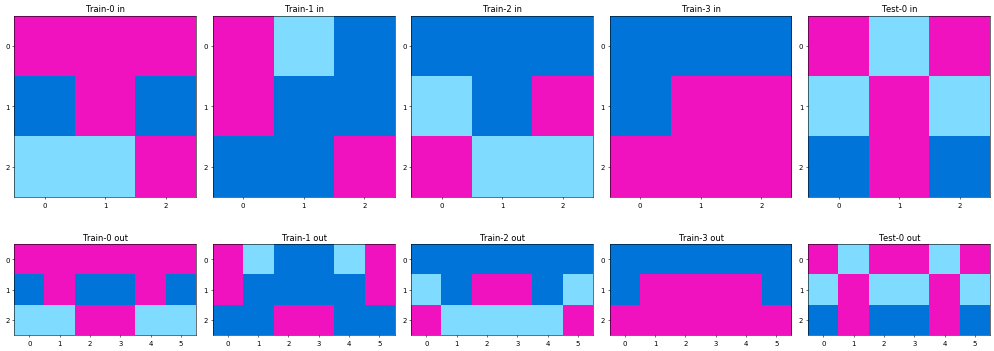

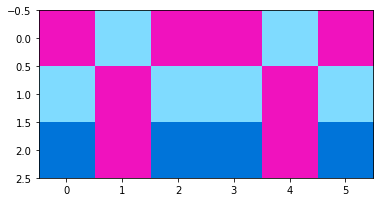

171 0


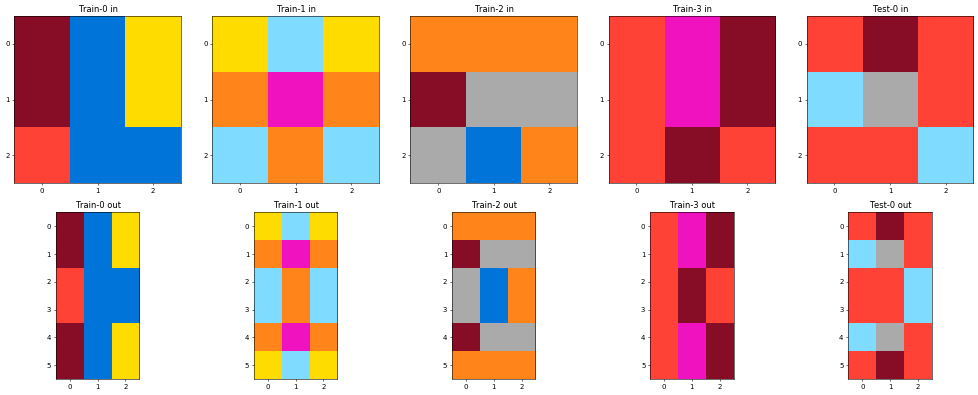

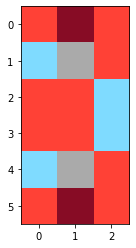

176 0


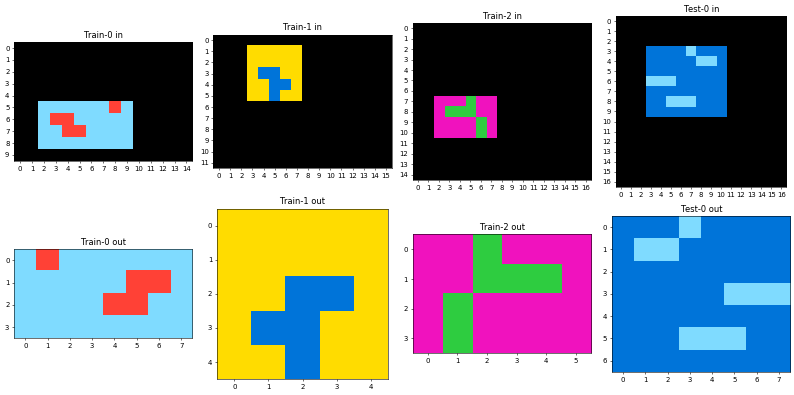

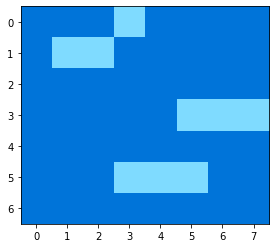

178 0


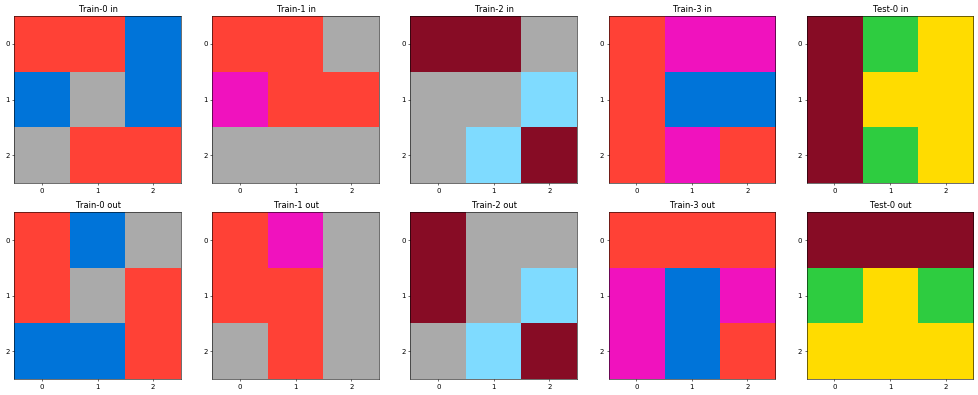

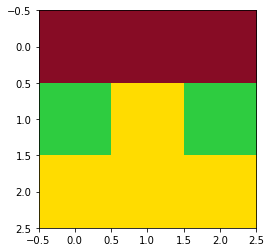

193 0


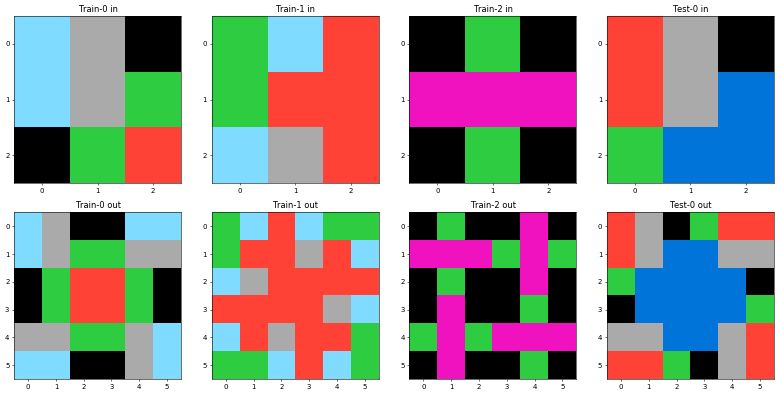

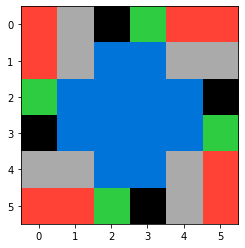

240 0


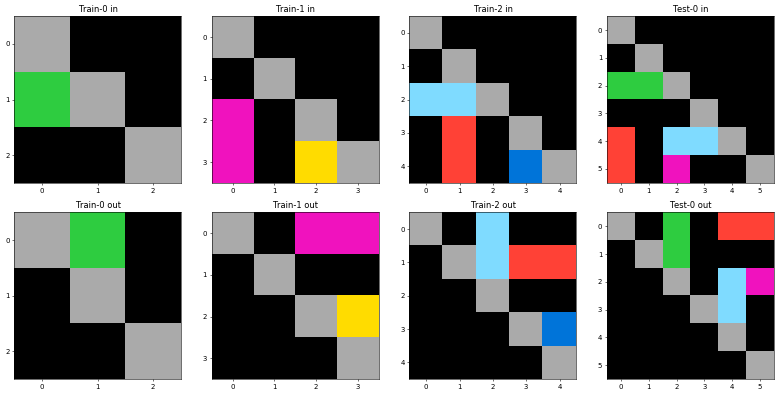

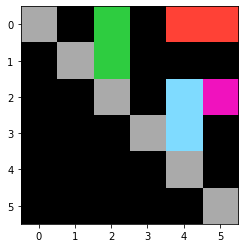

379 0


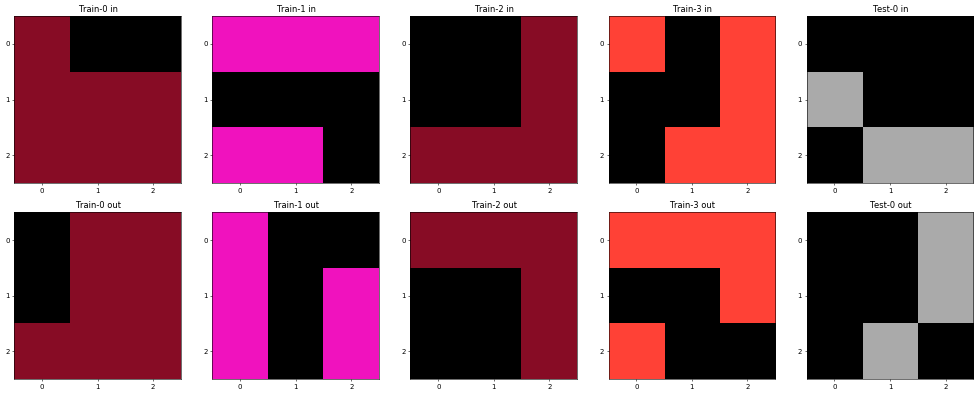

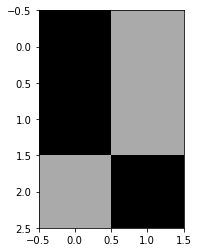

384 0


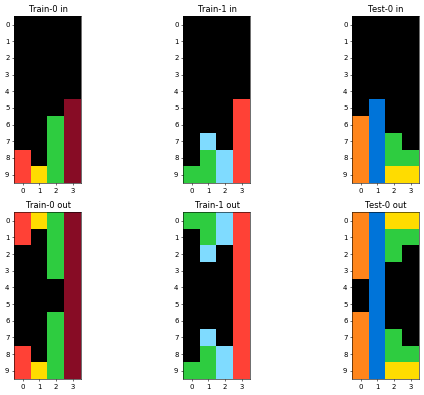

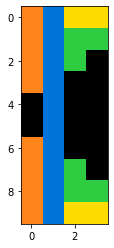

17


In [18]:
solved_train = []
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Solve_trans_bound(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_train.append((i,j))
            plot_task(task)
            plot_picture(proposed_solution)
            solved_id.add(i)
print(len(solved_train))

0 0


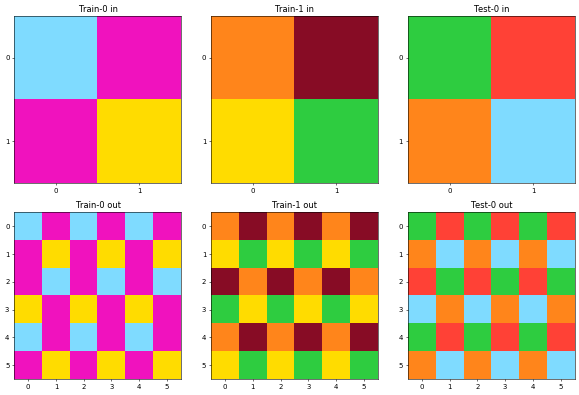

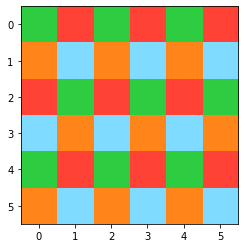

16 0


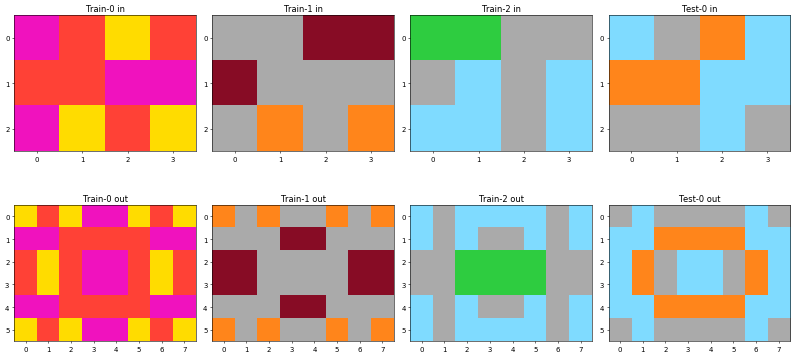

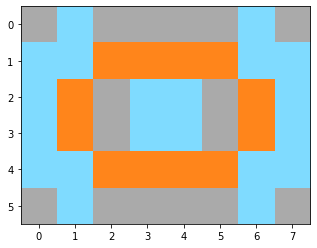

138 0


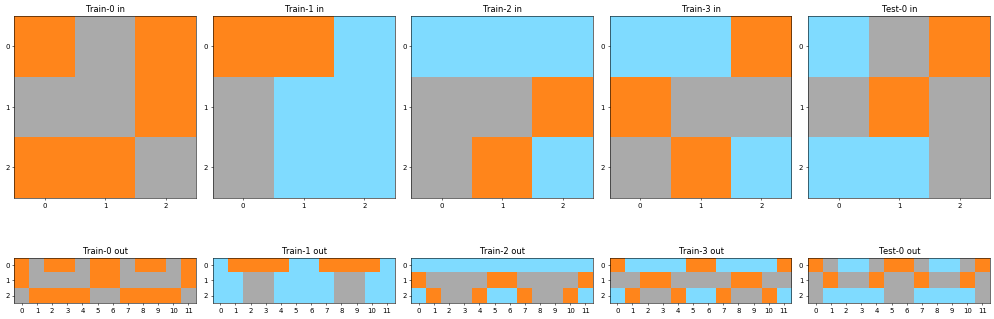

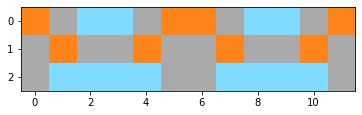

184 0


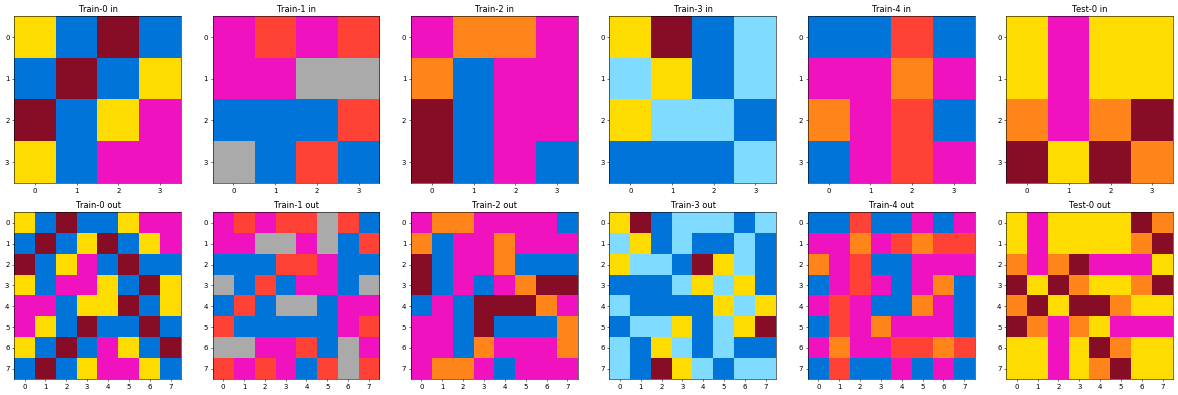

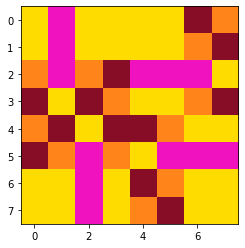

196 0


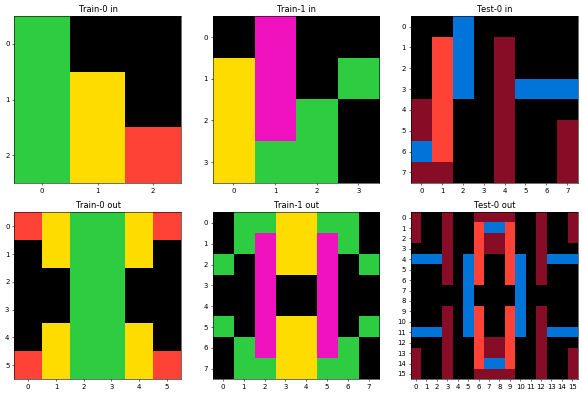

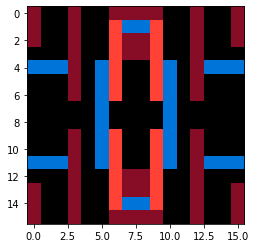

285 0


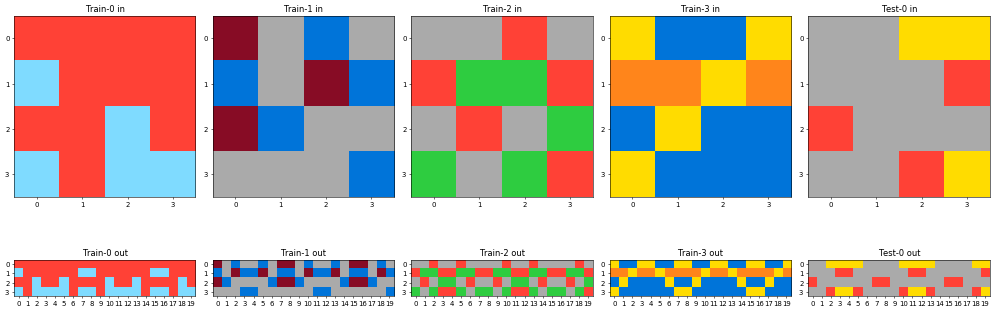

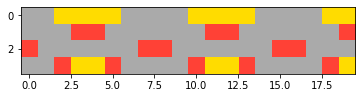

296 0


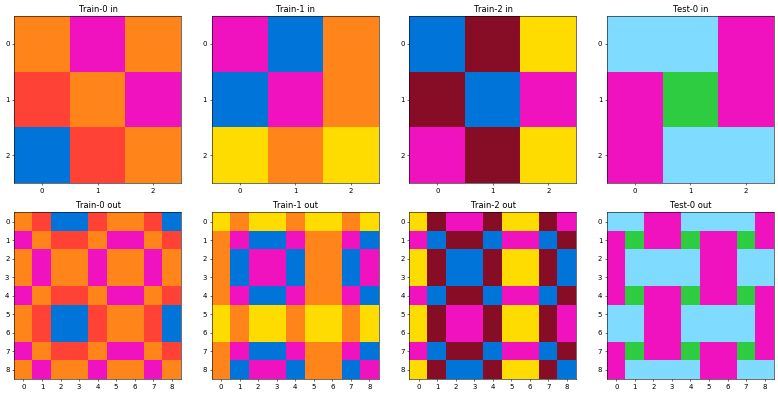

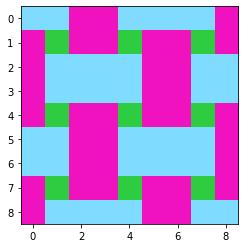

375 0


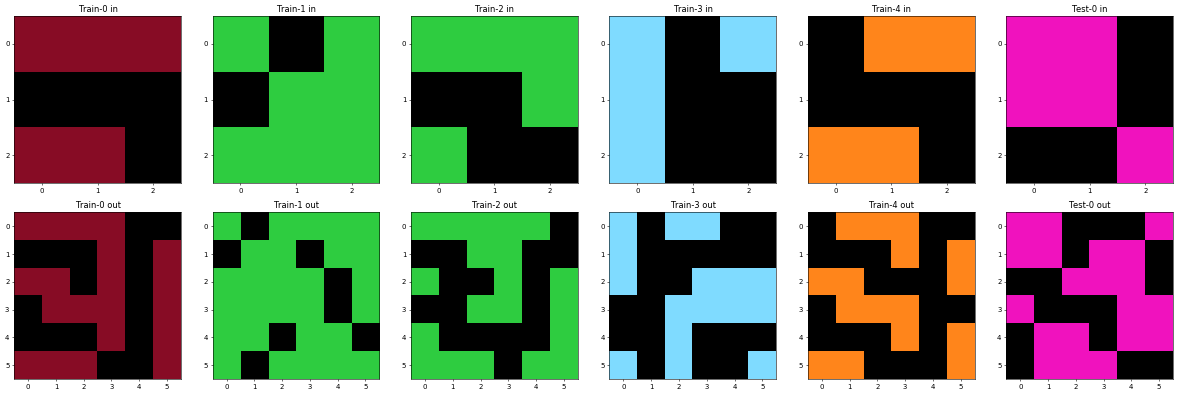

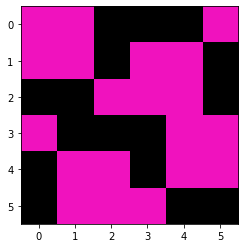

8


In [21]:
solved_train = []
for i in range(400):
    task =Evals[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Solve_trans_bound(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_train.append((i,j))
            plot_task(task)
            plot_picture(proposed_solution)
            solved_eva_id.add(i)
print(len(solved_train))

82 0


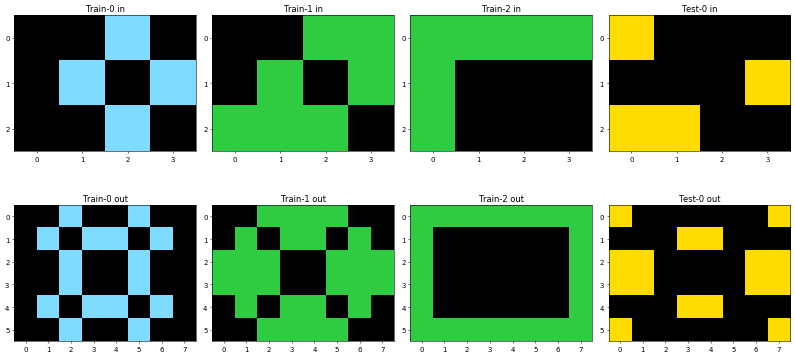

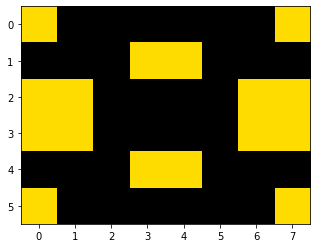

86 0


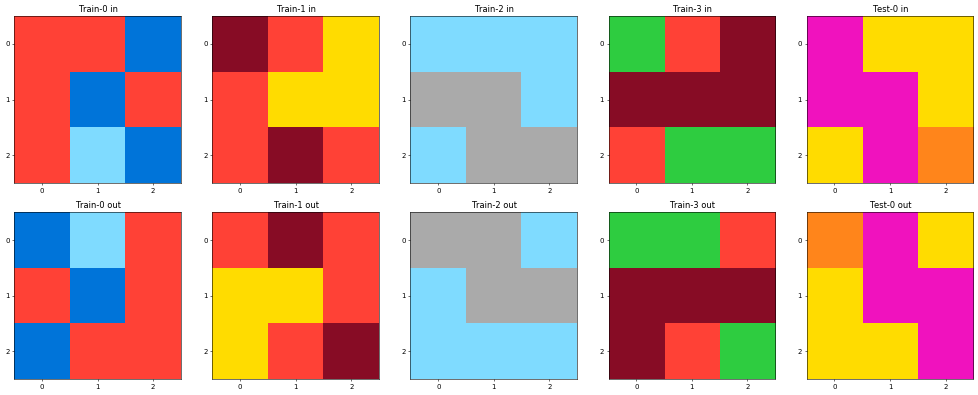

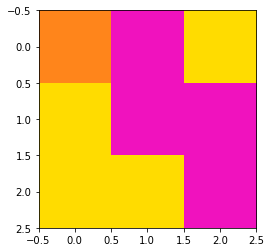

105 0


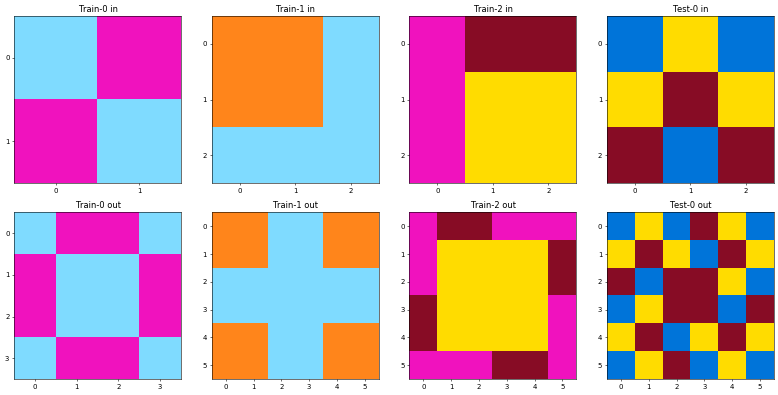

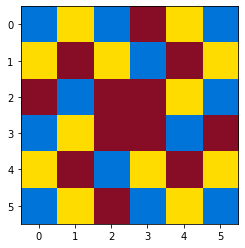

115 0


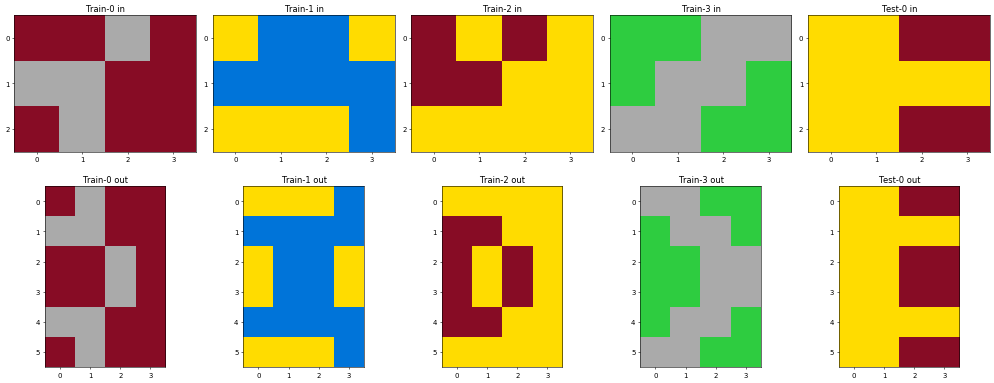

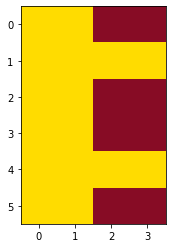

139 0


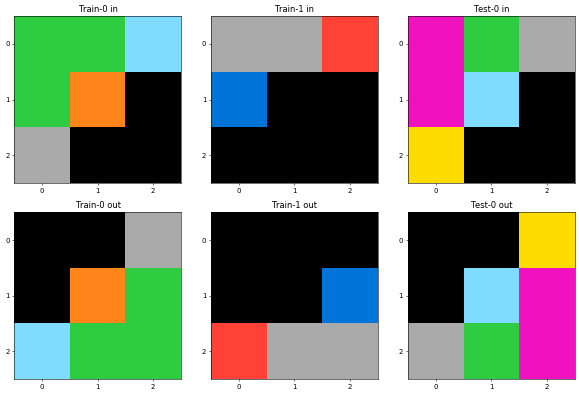

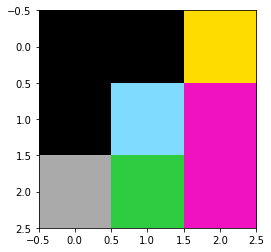

141 0


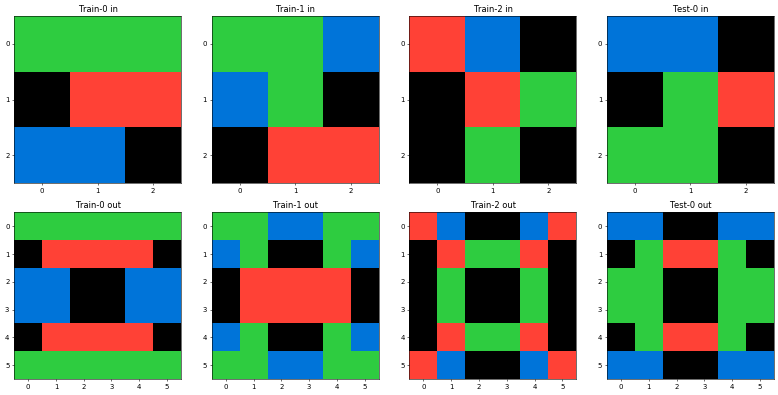

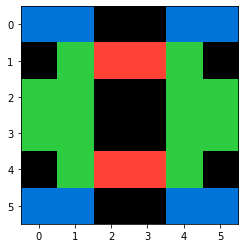

149 0


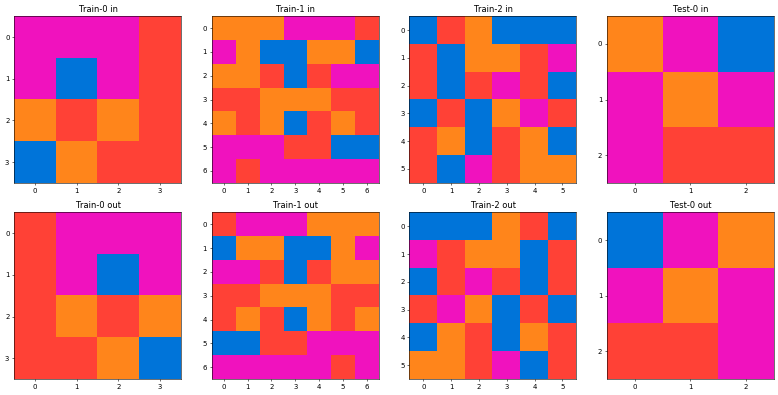

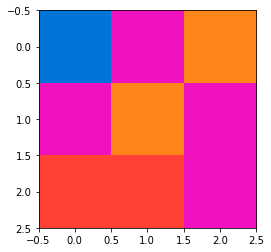

151 0


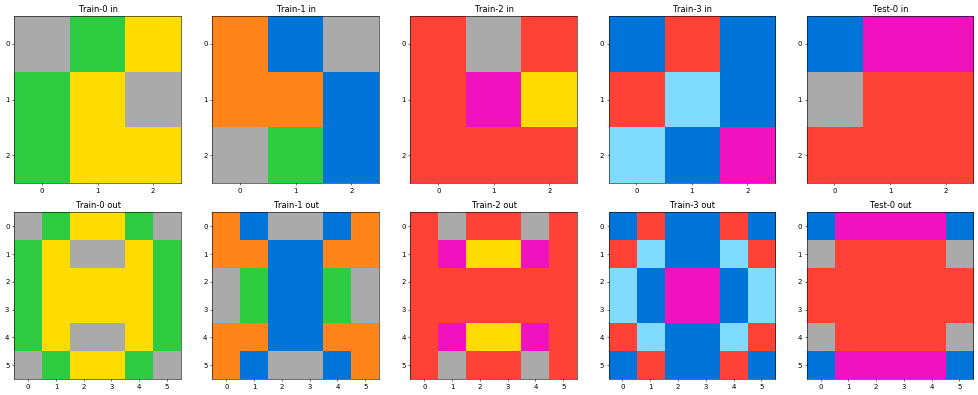

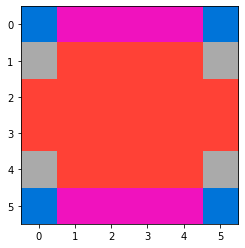

154 0


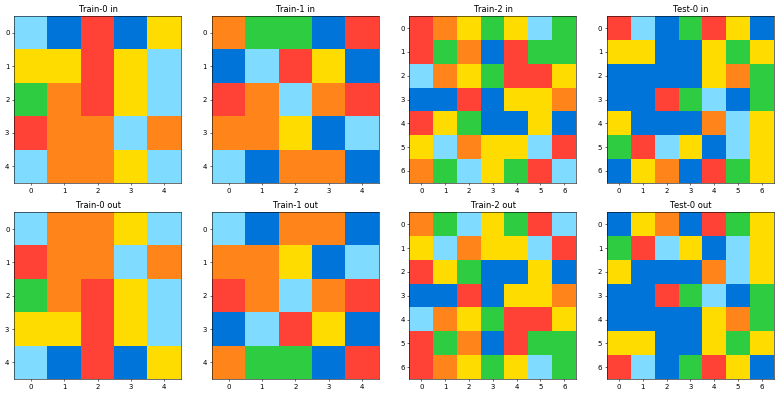

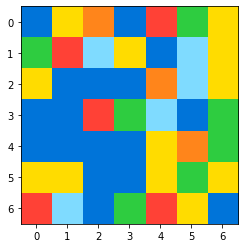

163 0


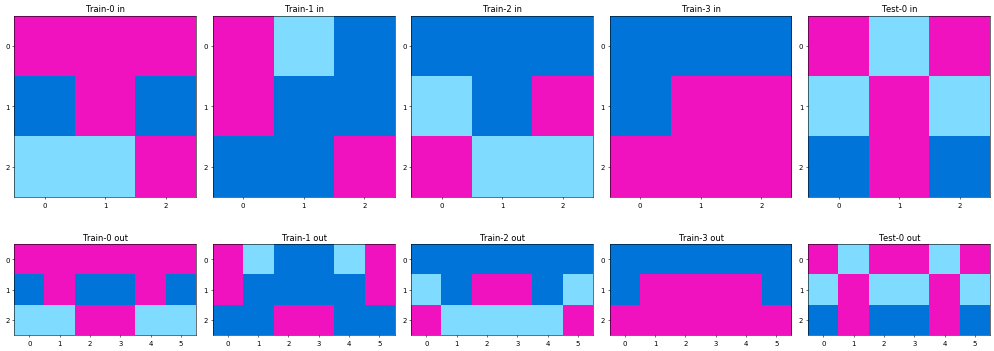

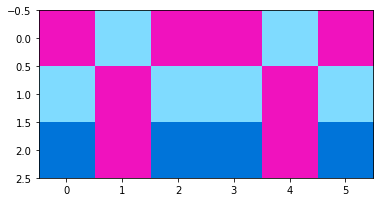

171 0


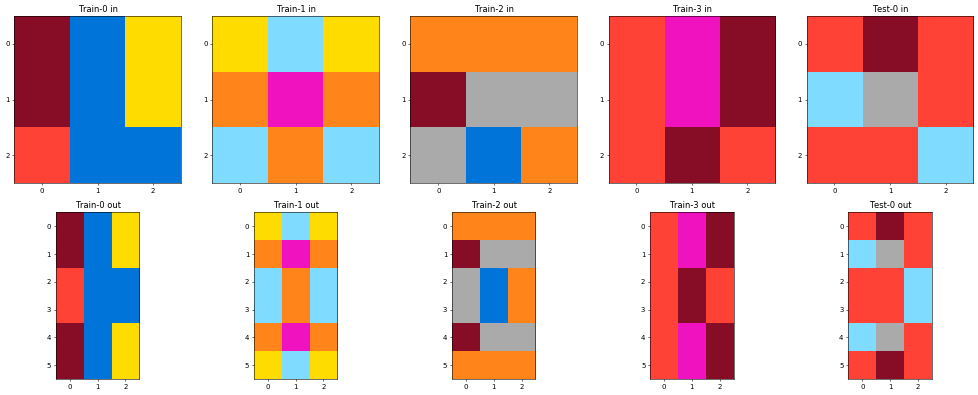

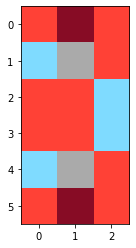

178 0


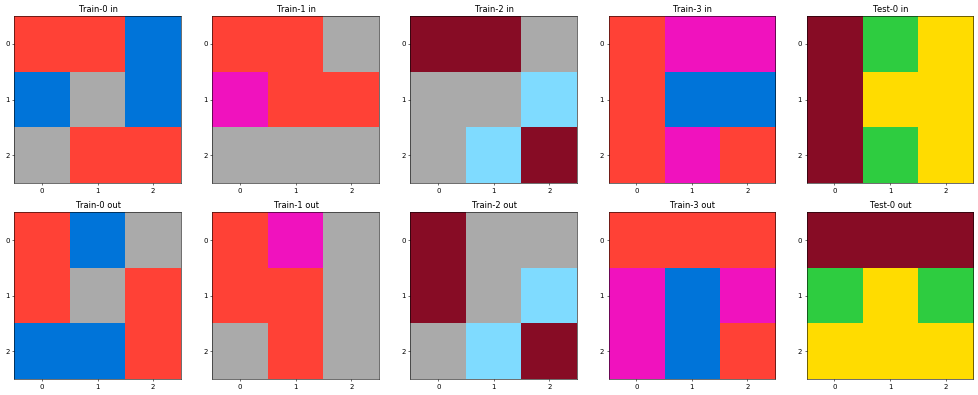

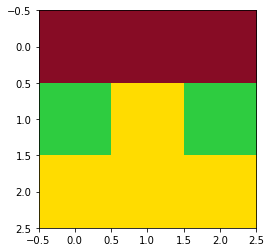

193 0


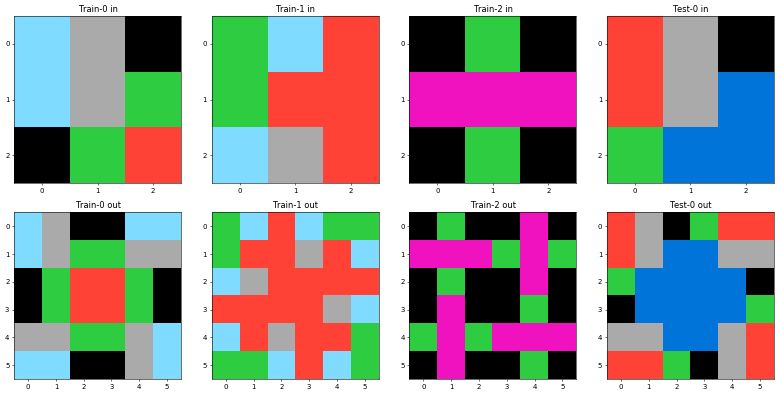

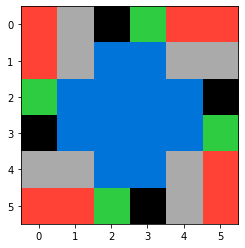

209 0


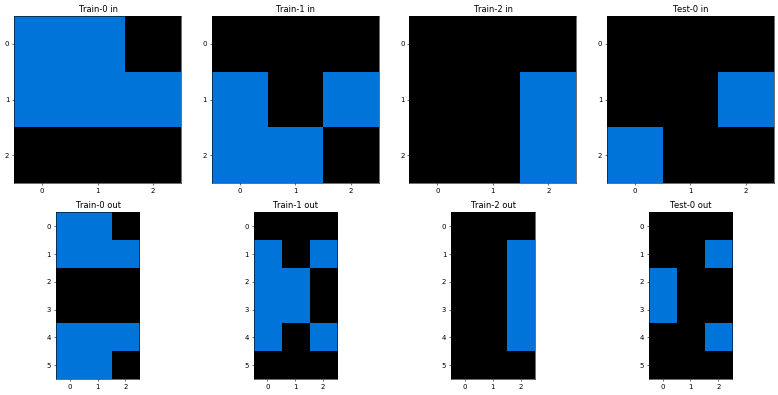

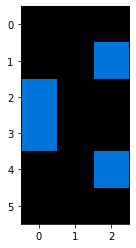

210 0


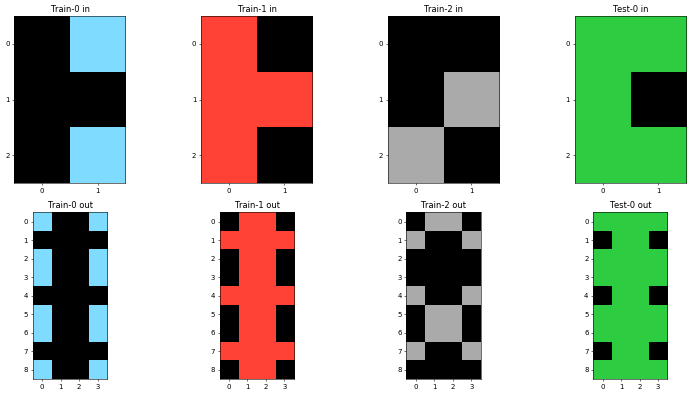

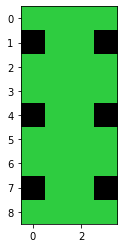

240 0


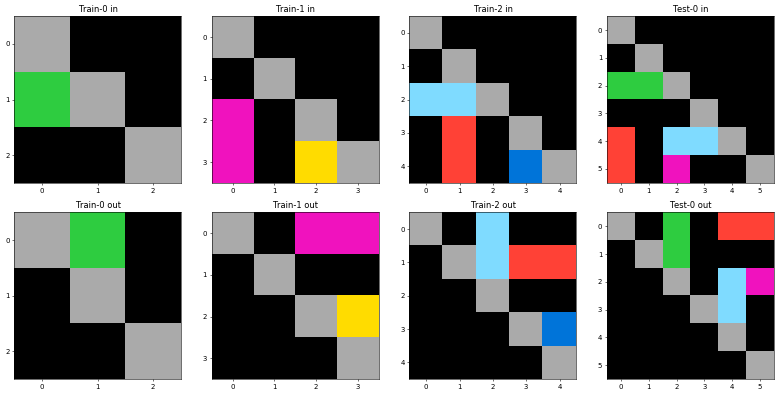

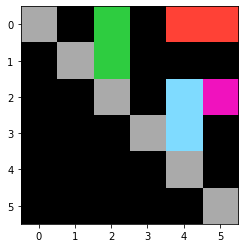

248 0


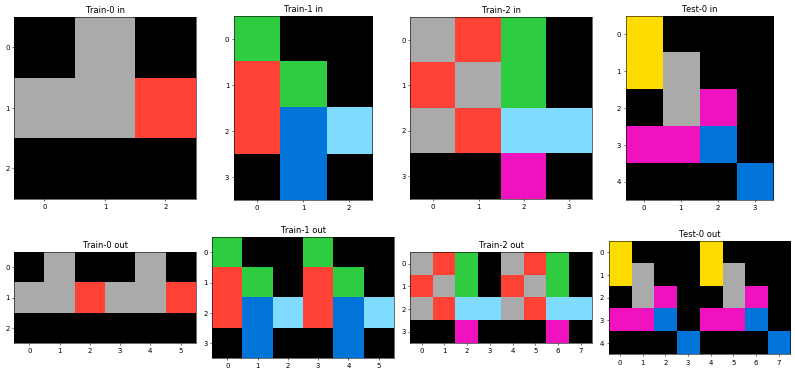

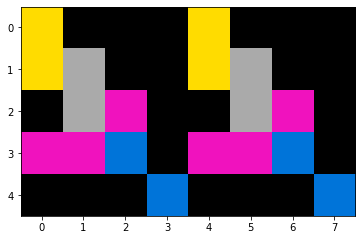

310 0


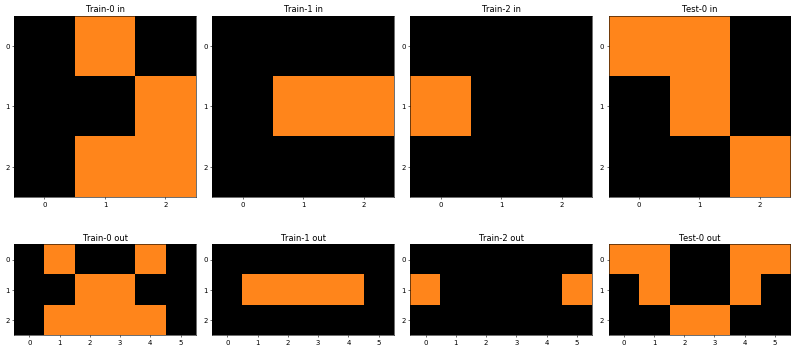

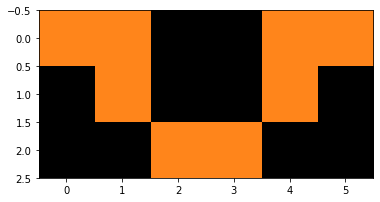

379 0


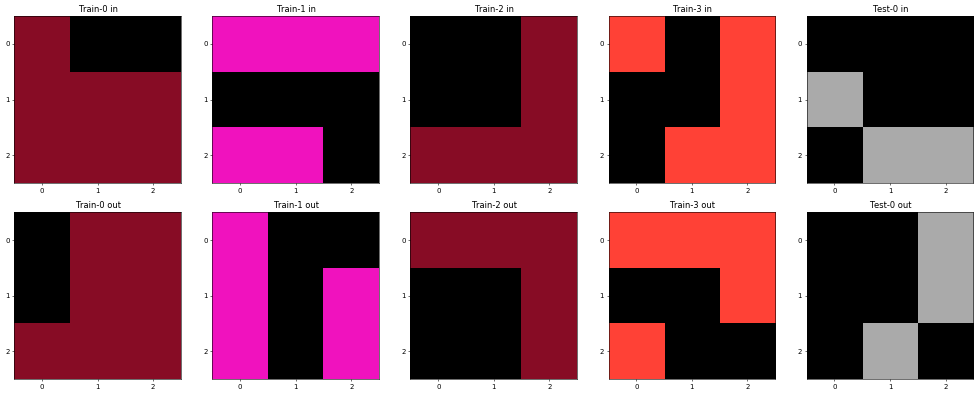

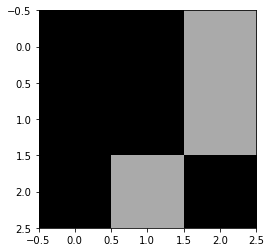

19


In [19]:

solved_train = []
for i in range(400):
    task = Trains[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Solve_trans(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_train.append((i,j))
            plot_task(task)
            plot_picture(proposed_solution)
            solved_id.add(i)
print(len(solved_train))



0 0


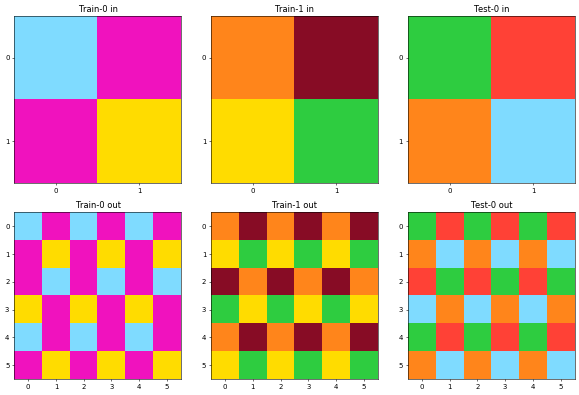

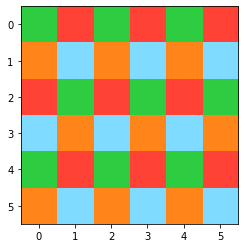

16 0


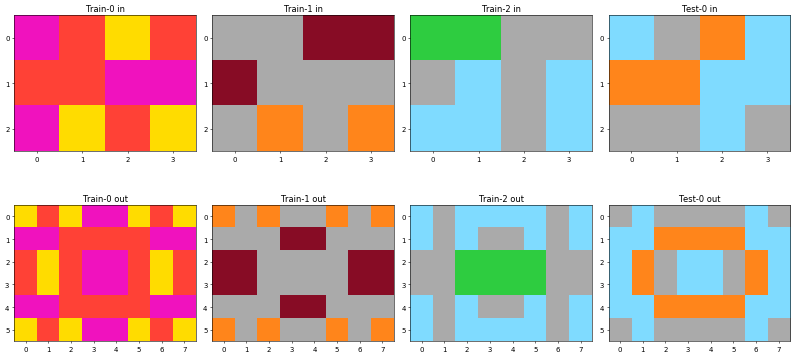

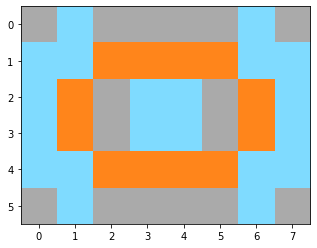

138 0


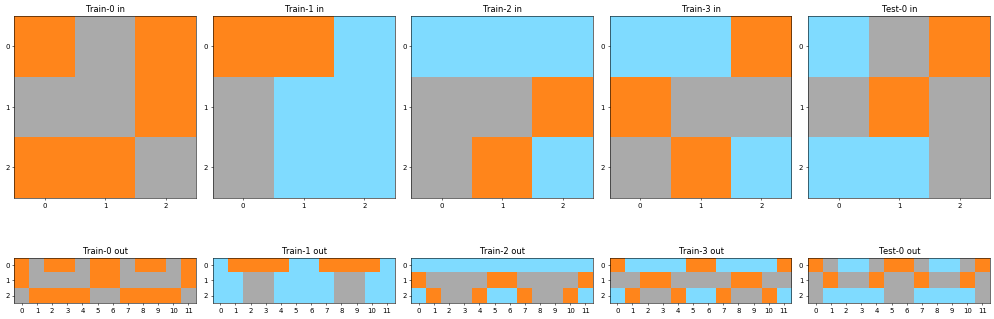

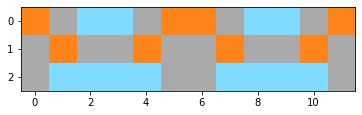

184 0


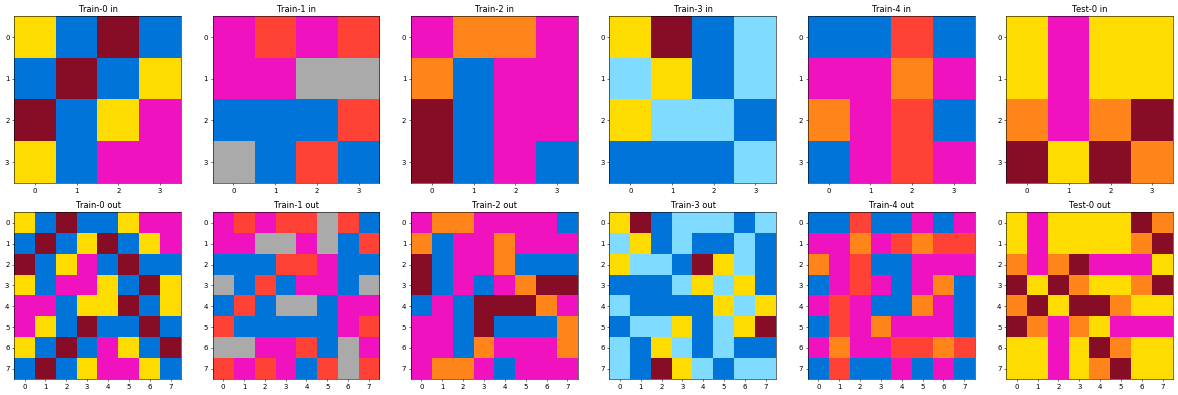

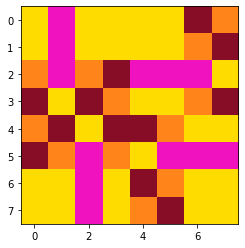

196 0


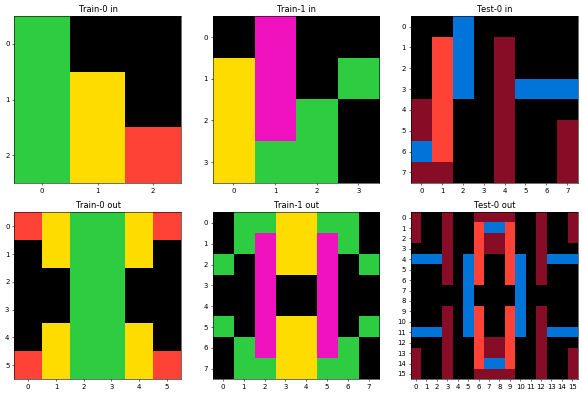

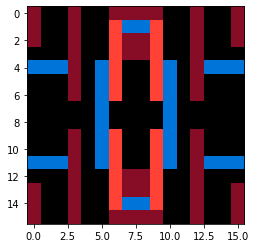

285 0


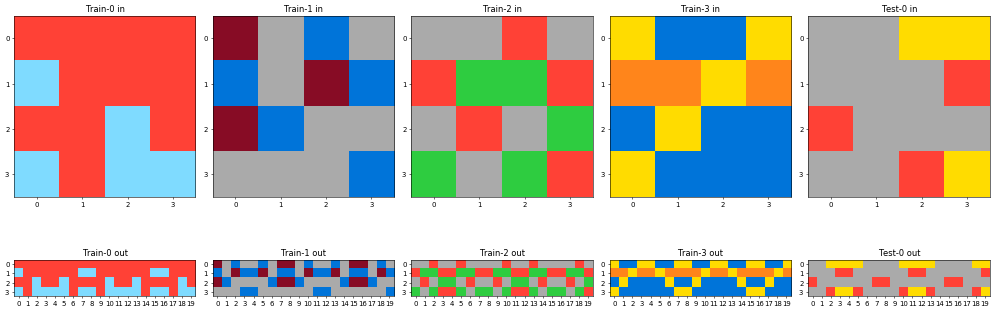

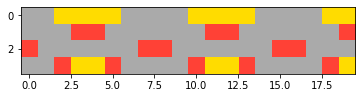

296 0


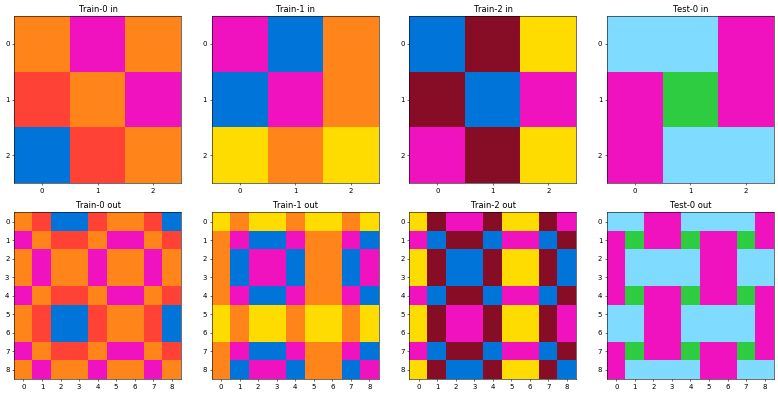

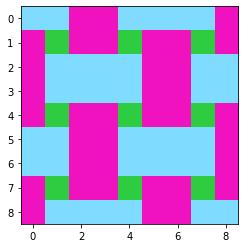

375 0


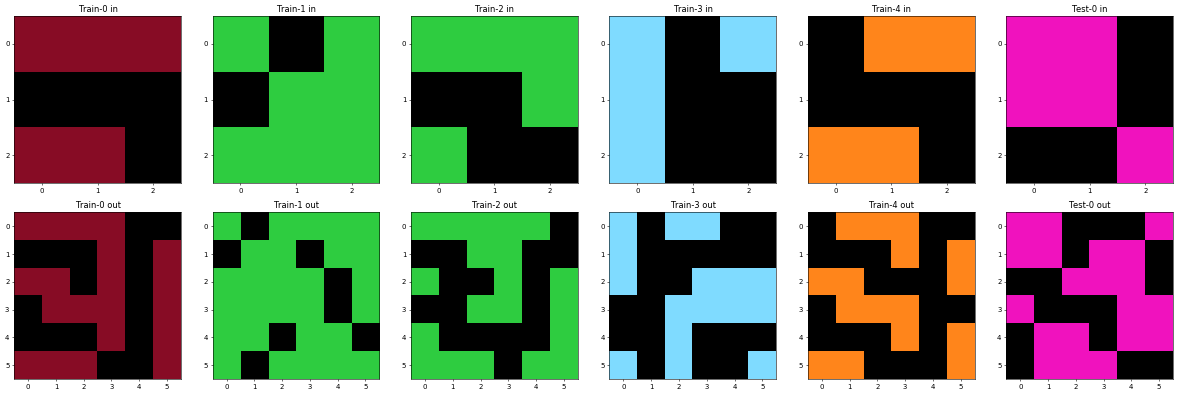

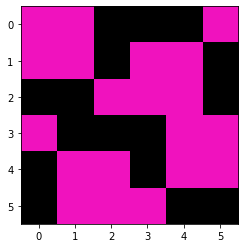

8
7.731442213058472


In [28]:
start=time.time()
solved_train = []
for i in range(400):
    task = Evals[i]
    
    k = len(task['test'])
    for j in range(k):
        
        basic_task = Create(task, j)
        proposed_solution = Solve_trans(basic_task)
        if proposed_solution != -1:
            print(i,j)
            solved_train.append((i,j))
            plot_task(task)
            plot_picture(proposed_solution)
            solved_eva_id.add(i)
print(len(solved_train))

end=time.time()
print(end-start)

In [29]:
def issubarray(A,B):
    a1=A.shape[0]
    a2=A.shape[1]
    b1=B.shape[0]
    b2=B.shape[1]
    if (a1==b1 and a2==b2) or b1>a1 or b2>a2 or(b1==1 and b2==1):
        return False
    c1=a1-b1+1
    c2=a2-b2+1
    for i in range(c1):
        for j in range(c2):
            if (A[i:i+b1,j:j+b2]==B).all():
                return True
    return False

In [30]:
def issubarray_match(task):
    for i in range(len(task)):
        A=np.array(task[i]["input"])
        B=np.array(task[i]["output"])
        if issubarray(A,B)==False:
            return False
    return True

In [31]:
def subarray_count(A,B):
    A=np.array(A)
    B=np.array(B)
    a1=A.shape[0]
    a2=A.shape[1]
    b1=B.shape[0]
    b2=B.shape[1]
    if (a1==b1 and a2==b2) or b1>a1 or b2>a2 or(b1==1 and b2==1):
        return 0
    c1=a1-b1+1
    c2=a2-b2+1
    i=0
    j=0
    count=0
    t=0
    while i<c1:
        while j<c2:
            if (A[i:i+b1,j:j+b2]==B).all():
                count+=1
                j+=b1
                t=1
            else:
                j+=1
        j=0
        if t==1:
            i+=b2
        else:
            i+=1        
    return count
# A比B大   
    

In [32]:
def color_counts(a):
    a=np.array(a)
    b = np.bincount(a.flatten(),minlength=10)
    b=b[1:]
    return b
#去黑
def color_counts_mul(C,E):
    c1=color_counts(C)
    e1=color_counts(E)
    m=0
    for i in range(len(e1)):
        if c1[i]==0 and e1[i]==0:
            continue
        elif c1[i]<e1[i] or (c1[i]==0 and e1[i]!=0) or (e1[i]==0 and c1[i]!=0):
            return 0
        else:
            if c1[i]%e1[i]!=0:
                return 0
            else:
                n=c1[i]//e1[i]
                if m!=0 and m!=n:
                    return 0
                m=n
    return m

In [33]:
def maxcolor(A):
    b = np.bincount(A.flatten(),minlength=10)
    b[0] = 500 #???255
    c=np.argsort(b)[-2]
    return c
#no count black

def mincolor(A):
    try:
        b = np.bincount(A.flatten(),minlength=10)
        b1=np.delete(b,0)
        #b1=b
        c = int(np.where(b==np.min(b1[np.nonzero(b1)]))[0])
        return c
    except:
        return 0


In [34]:
color_select=[maxcolor,mincolor,0,1,2,3,4,5,6,7,8,9]
#np.bincount(A)[color_select]

In [35]:
def colorbycolor_select(A,S):
    A=np.array(Defensive_Copy(A))
    if S in color_select:
        if type(S) != int:
            x=S(A)
        else:
            x=S
        return x

        

In [36]:
def Match_color(basic_task): 
    #returns -1 if no match is found
    #returns  Transformed_Test_Case  if the mathching rule is found
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    for i in range(len(color_select)):
        S = color_select[i]
        solved = True
        
        for x, y in zip(Input,Output):
            c=colorbycolor_select(x,S)
            x1=np.array(x)
            transformed_x = np.bincount(x1.flatten(),minlength=10)[c]
            if transformed_x==0 or transformed_x != subarray_count(y,x):
                #可擴充
                solved = False
                break
        if solved == True:
            Test_Case1=np.array(Test_Case)
            Transformed_Test_Case = np.bincount(Test_Case1.flatten(),minlength=10)[colorbycolor_select(Test_Case,S)]
            return colorbycolor_select(Test_Case,S),Transformed_Test_Case
           
    return -1
#顏色,數量

In [37]:
for i in [0,303,314]:
    task = Trains[i]
    k = len(task['test'])
    for j in range(k):        
        basic_task = Create(task, j)
        
        print(Match_color(basic_task))
    

(7, 6)
(1, 4)
(2, 4)


In [38]:
#[0,303,314]
def Solve_mul_color(basic_task): 
    # returns -1 if no match is found
    # returns Transformed_Test_Case  if the mathching rule is found
    # for this notebook we only look at mul color match
    Input = [Defensive_Copy(x) for x in basic_task[0]]
    Output = [Defensive_Copy(y) for y in basic_task[1]]
    Test_Case = Input[-1]
    Input = Input[:-1]
    same_ratio = True
    R_x = []
    R_y = []
    for x, y in zip(Input,Output):
        n1 = len(x)
        n2 = len(y)
        k1 = len(x[0])
        k2 = len(y[0])
        if n2%n1 != 0 or k2%k1 != 0:
            same_ratio = False
            break
        else :
            R_y.append(n2//n1)
            R_x.append(k2//k1)
    
    if same_ratio and min(R_x) == max(R_x) and min(R_y)==max(R_y) and min(R_x)==len(Test_Case) and min(R_y)==len(Test_Case[0]): 
        r1 = min(R_y)
        r2 = min(R_x)
        if Match_color(basic_task)==-1:
            return -1
        color,count=Match_color(basic_task)
        
        Test_Case_list=[]
        Test_Case_Wight_2=[]
        Test_Case_flatten=((np.array(Test_Case)).flatten()).tolist()
        for panel in range(r1*r2):
            Test_Case_list.append(Test_Case)

            
            if Test_Case_flatten[panel]!=color:
                Test_Case_Wight_2.append(0)
            else:
                Test_Case_Wight_2.append(1)
        Partial_Solutions=[]
        for panel in range(r1*r2):
            Partial_Solutions.append((np.array(Test_Case_list[panel]))*Test_Case_Wight_2[panel])
        Transformed_Test_Case=Glue(Partial_Solutions, r1, r2)
        return Transformed_Test_Case
    
    return -1

0 0


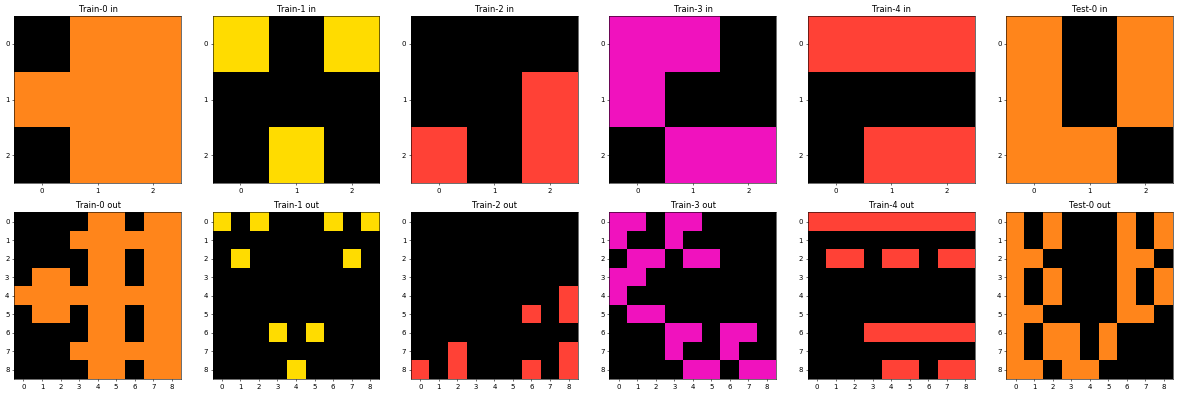

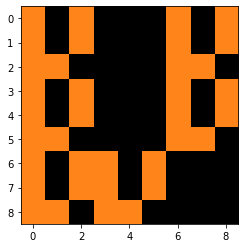

303 0


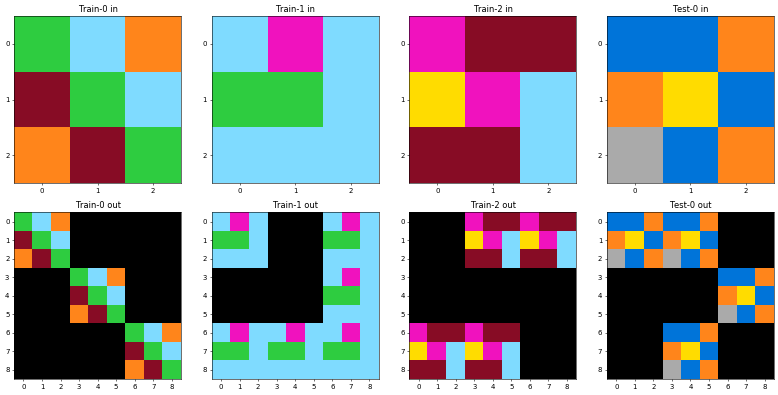

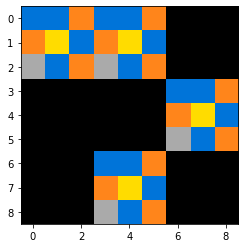

314 0


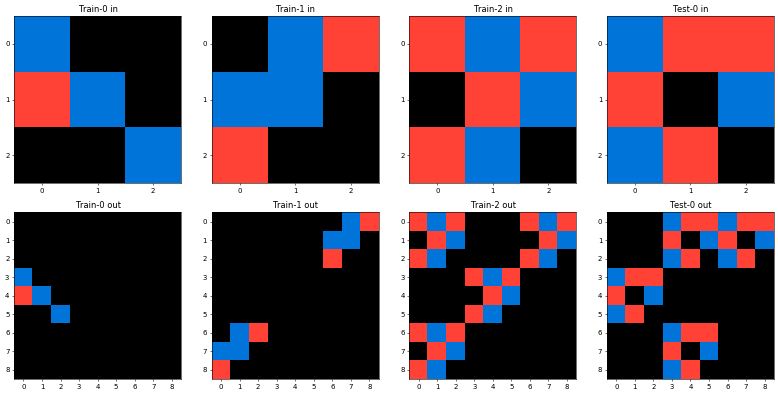

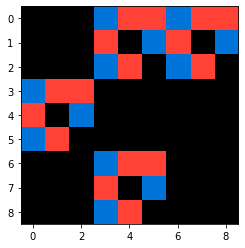

In [39]:
for i in range(400):
    task = Trains[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=Solve_mul_color(basic_task)
        if a!=-1:
            print(i,j)
            #solved_train.append((i,j))
            plot_task(task)
            plot_picture(a)
            solved_id.add(i)
        

67 0


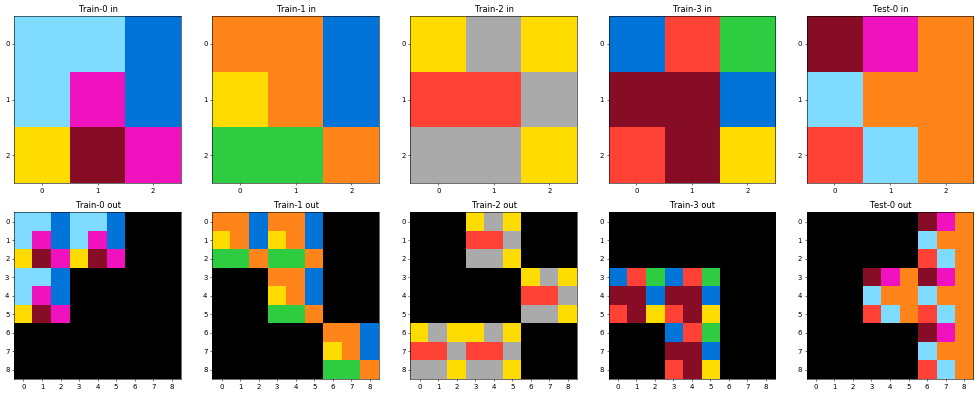

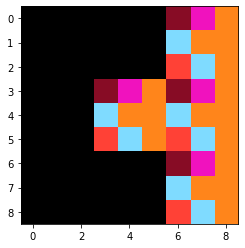

110 0


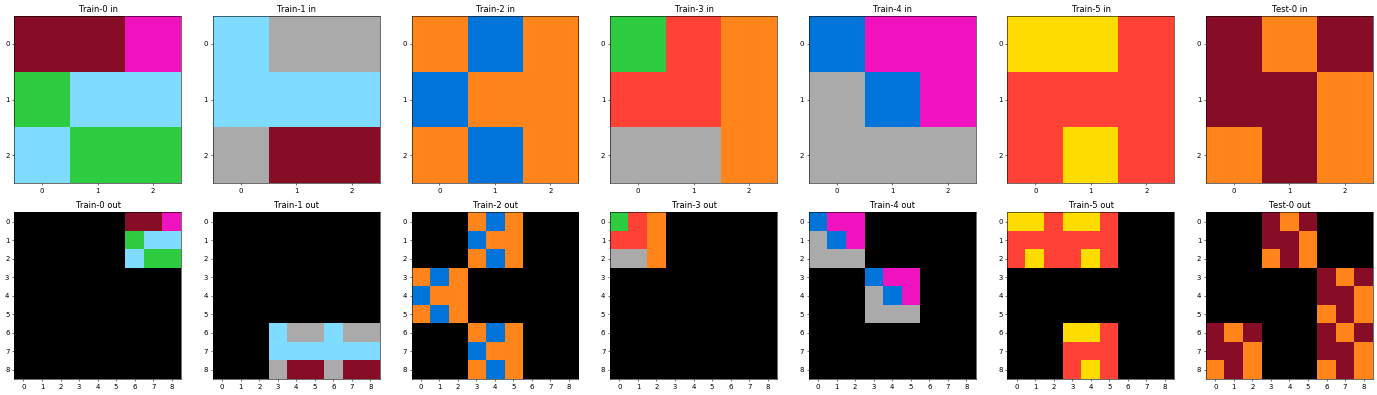

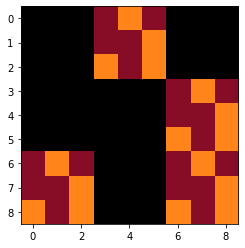

143 0


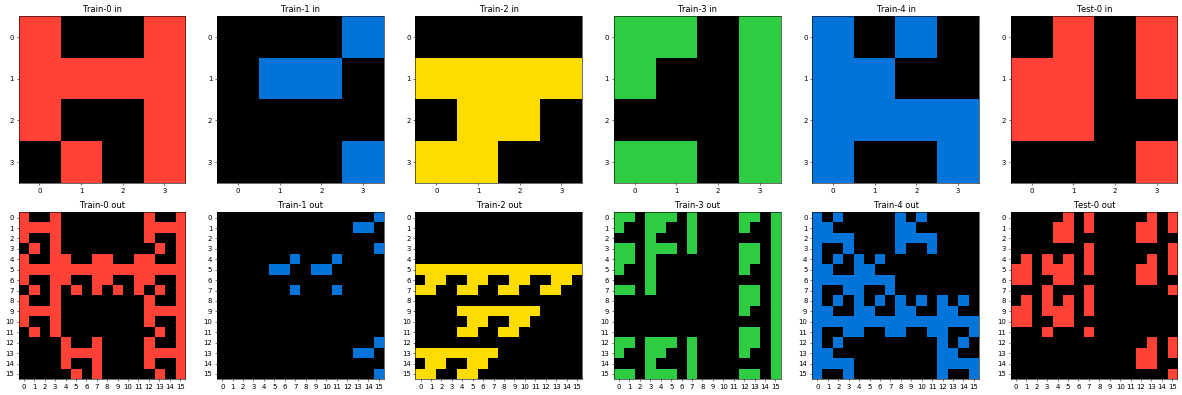

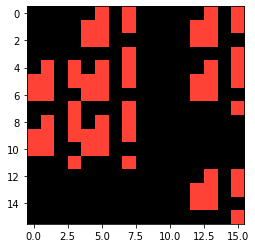

In [40]:
for i in range(400):
    task = Evals[i]
    k = len(task['test'])

    for j in range(k):        
        basic_task = Create(task, j)
        a=Solve_mul_color(basic_task)
        if a!=-1:
            print(i,j)
            #solved_train.append((i,j))
            plot_task(task)
            plot_picture(a)
            solved_eva_id.add(i)

In [41]:
solved_id

{0,
 30,
 56,
 82,
 86,
 105,
 115,
 139,
 141,
 149,
 151,
 154,
 163,
 171,
 176,
 178,
 193,
 209,
 210,
 240,
 248,
 303,
 310,
 314,
 379,
 384}

In [54]:
len(solved_eva_id)

11

In [44]:
solved_train=list(solved_id)
solved_Evals=list(solved_eva_id)

In [43]:
solved_train

[384,
 0,
 139,
 141,
 149,
 151,
 154,
 30,
 163,
 171,
 303,
 176,
 178,
 310,
 56,
 314,
 193,
 209,
 210,
 82,
 86,
 105,
 240,
 115,
 248,
 379]

In [45]:
solved_Evals

[0, 67, 196, 296, 138, 110, 143, 16, 375, 184, 285]